## **Problem statement-**
This data given by an airline organization.

The dataset consists of the details of customers who have already flown with them. The feedback of the customers on various context and their flight data has been consolidated.

The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values.

Also the airlines need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers.

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### **Creating dataframe for data**

In [ ]:
airline= pd.read_csv('/content/drive/MyDrive/Invistico_Airline.csv')
pd.set_option('display.max_columns',None)
airline.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

### **Data Cleaning**

In [ ]:
#Finding duplicate data
airline.duplicated().sum()

0

In [ ]:
#Calculating null value precentage in Arrival Dealy in Minutes
(airline['Arrival Delay in Minutes'].isnull().sum()/len(airline))*100

0.3025870033877425

In [ ]:
#Numarical Columns
numarical_columns= ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

In [ ]:
#finding Correlation between numarical columns
round(airline[numarical_columns].corr(),2)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.00,-0.25,-0.01,-0.01
Flight Distance,-0.25,1.00,0.11,0.11
Departure Delay in Minutes,-0.01,0.11,1.00,0.97
Arrival Delay in Minutes,-0.01,0.11,0.97,1.00


Arrival Delay in Minutes and Departure Delay in Mintes has high Correaltion. So we can drop Arrival Delay in Minutes column since it has null values also.

In [ ]:
#Dropping Column
airline = airline.drop('Arrival Delay in Minutes', axis=1)

In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction                       129880 non-null  object
 1   Gender                             129880 non-null  object
 2   Customer Type                      129880 non-null  object
 3   Age                                129880 non-null  int64 
 4   Type of Travel                     129880 non-null  object
 5   Class                              129880 non-null  object
 6   Flight Distance                    129880 non-null  int64 
 7   Seat comfort                       129880 non-null  int64 
 8   Departure/Arrival time convenient  129880 non-null  int64 
 9   Food and drink                     129880 non-null  int64 
 10  Gate location                      129880 non-null  int64 
 11  Inflight wifi service              129880 non-null  

In [ ]:
#Statistical Analysis
airline.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000


#**EDA**

<Axes: xlabel='Flight Distance'>

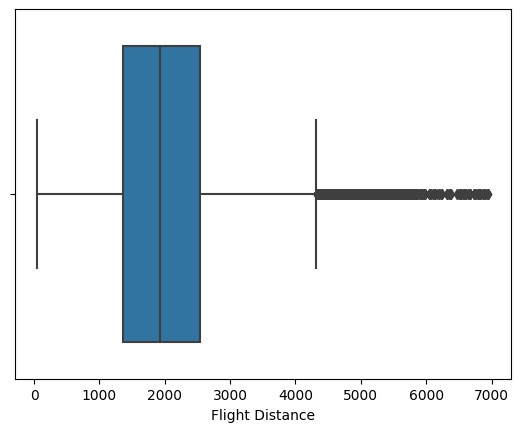

In [ ]:
#Analysis of Fight Distance
sns.boxplot(data=airline, x='Flight Distance')

<Axes: xlabel='Departure Delay in Minutes'>

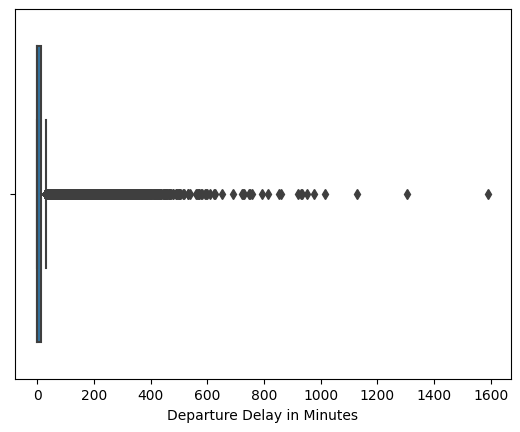

In [ ]:
#Analysing Delay in departure column
sns.boxplot(data=airline, x='Departure Delay in Minutes')

Few fight are delayed more than 1200 minutes which is work as outliers in the data.

In [ ]:
airline[airline['Departure Delay in Minutes']>=1200]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
9704,dissatisfied,Female,Loyal Customer,47,Personal Travel,Eco,3113,2,2,2,3,2,4,2,2,4,4,4,2,3,2,1592
122928,satisfied,Male,Loyal Customer,32,Business travel,Business,4425,2,2,2,2,5,5,5,3,4,5,4,5,3,5,1305


Dropping outlier from Departure Delay in Minutes.

In [ ]:
#Dropping the column
airline= airline[airline['Departure Delay in Minutes']<=1200]

<Axes: xlabel='Age', ylabel='Count'>

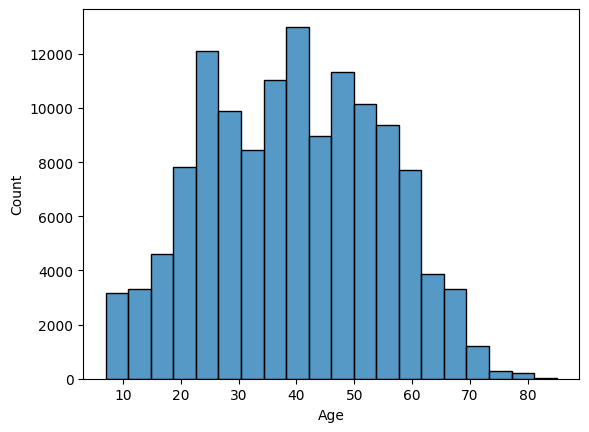

In [ ]:
#Analysing the age of passengers
sns.histplot(data=airline, x='Age', bins=20)

Maximum passengers are aged between 20 to 50 years

<Axes: xlabel='Age', ylabel='Density'>

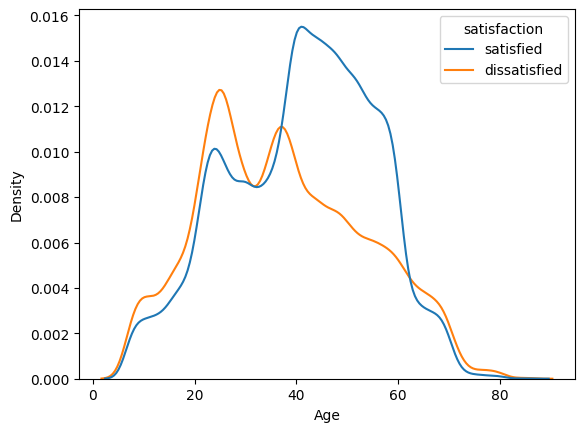

In [ ]:
#Finding pattern of satisfaction in based on age
sns.kdeplot(data=airline, x='Age',hue='satisfaction')

Observation:
- People aged around 40-50 years are more satisfied.
- People aged around 20 -30 years are more dissatisfied.

(0.0, 400.0)

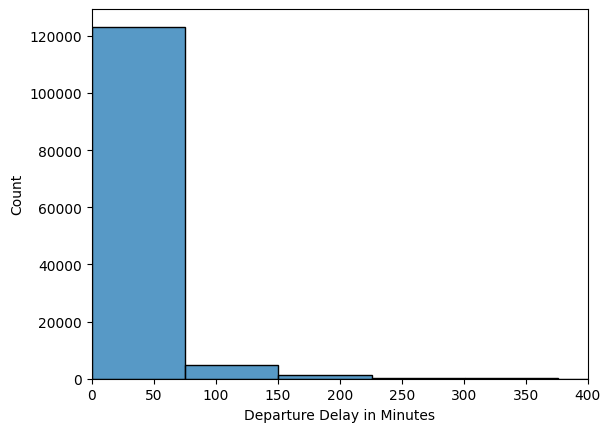

In [ ]:
#Analysing delay in departure time
sns.histplot(data=airline, x='Departure Delay in Minutes', bins=15)
plt.xlim(0,400)

Most flight are delayed less then 90mins.

<Axes: xlabel='Departure Delay in Minutes', ylabel='Density'>

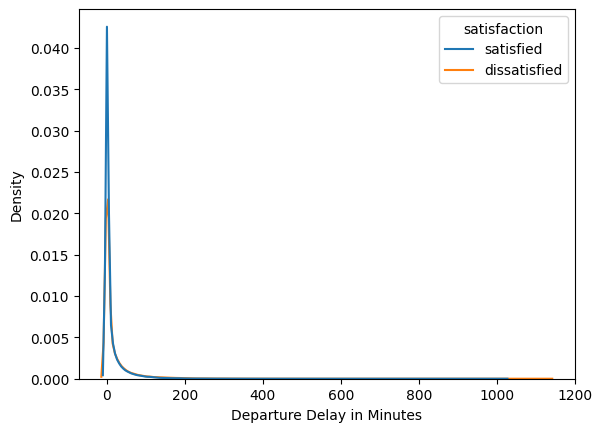

In [ ]:
#Satisfaction level V/S delay
sns.kdeplot(data=airline, x='Departure Delay in Minutes',hue='satisfaction')

If We see the big picture passengers are satisfied but need more analysis.

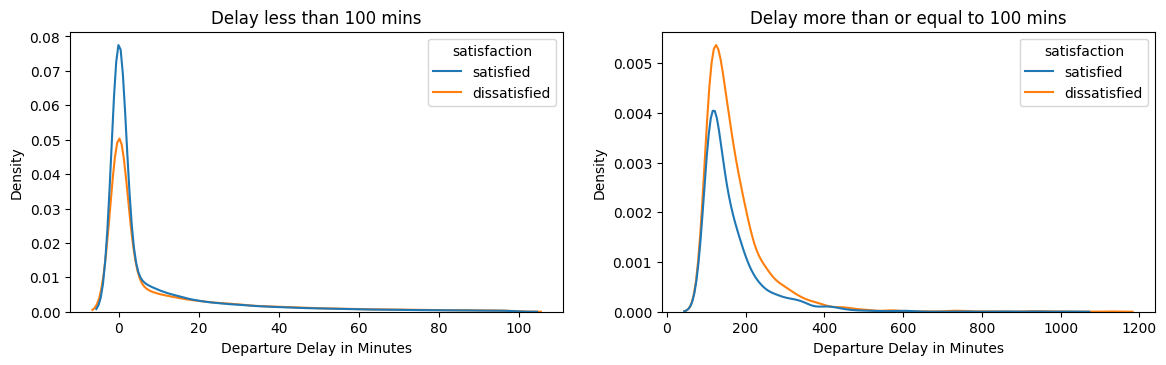

In [ ]:
#Grouping the date into 2 sets.
plt.figure(figsize=[14,8])
plt.subplot(2,2,1)
#Delay less than or equal to 100 minutes
plt.title("Delay less than 100 mins")
sns.kdeplot(data=airline, x=airline[airline['Departure Delay in Minutes']<100]['Departure Delay in Minutes'],hue='satisfaction')
#Delay more than or equal to 100 minutes
plt.subplot(2,2,2)
plt.title("Delay more than or equal to 100 mins")
sns.kdeplot(data=airline, x=airline[airline['Departure Delay in Minutes']>=100]['Departure Delay in Minutes'],hue='satisfaction')
plt.show()

Observation:
- If a flight is delayed less than 100 mins passengers still can be satisfied if other services are good.
- If a flight is delayed more than 100 mins satisfaction level will be decrease.

<Axes: xlabel='Class', ylabel='count'>

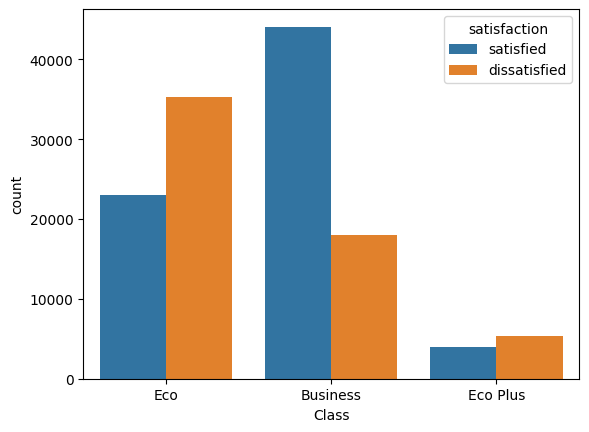

In [ ]:
#Analysis of service based on class
sns.countplot(data=airline, x='Class', hue='satisfaction')

- Business Class passengers are more satisfied compared to other class passengers.

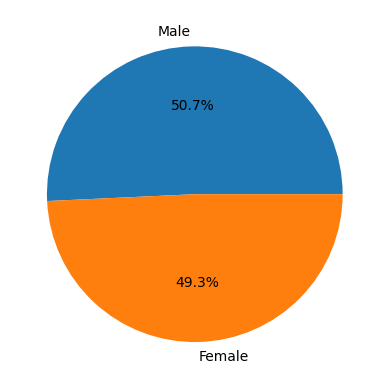

In [ ]:
#Analysis by Gender
plt.pie(airline['Gender'].value_counts(), autopct= '%1.1f%%', labels=['Male', 'Female'])
plt.show()

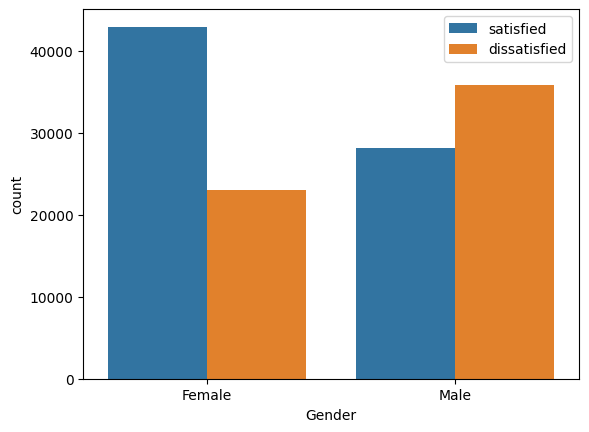

In [ ]:
#Satisfaction based on gender
sns.countplot(data=airline, x='Gender', hue='satisfaction')
plt.legend(loc = 0)

Observation:
- Females are more satisfied compared to males.

<Axes: xlabel='Food and drink', ylabel='count'>

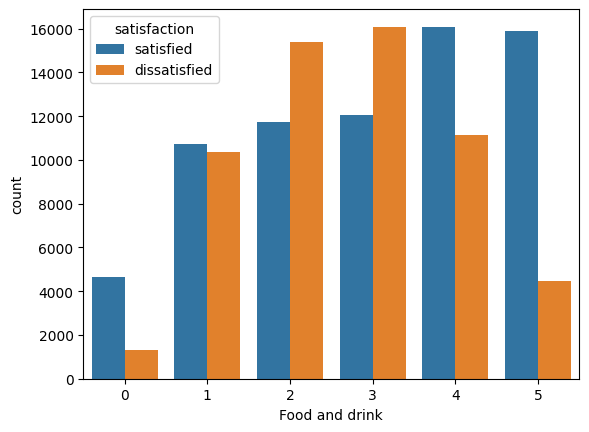

In [ ]:
#Analysis based on food and drink
sns.countplot(data=airline, x='Food and drink',hue='satisfaction')

<Axes: xlabel='Departure/Arrival time convenient', ylabel='count'>

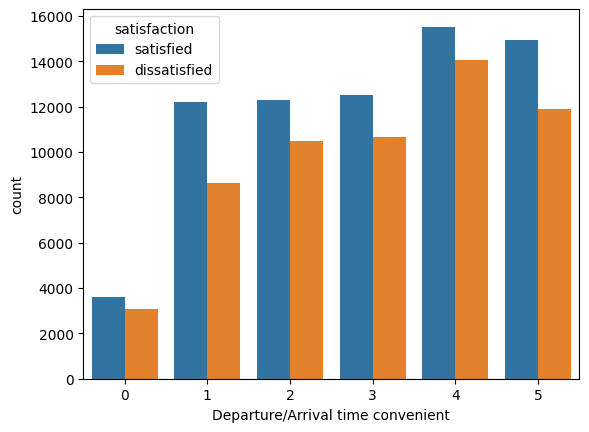

In [ ]:
#Analysis based on Departure/Arrival time convenient
sns.countplot(data=airline, x='Departure/Arrival time convenient', hue='satisfaction')

Observation:
- Departure/Arrival time is a weak feature to determine the satisfaction of passengers.

<Axes: xlabel='Inflight wifi service', ylabel='count'>

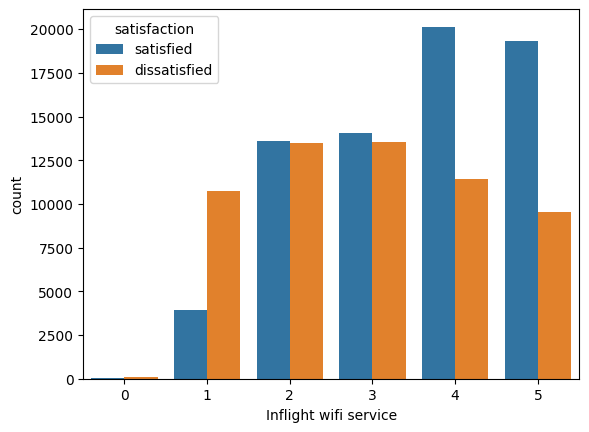

In [ ]:
sns.countplot(data=airline, x= 'Inflight wifi service', hue='satisfaction')

<Axes: xlabel='Inflight entertainment', ylabel='count'>

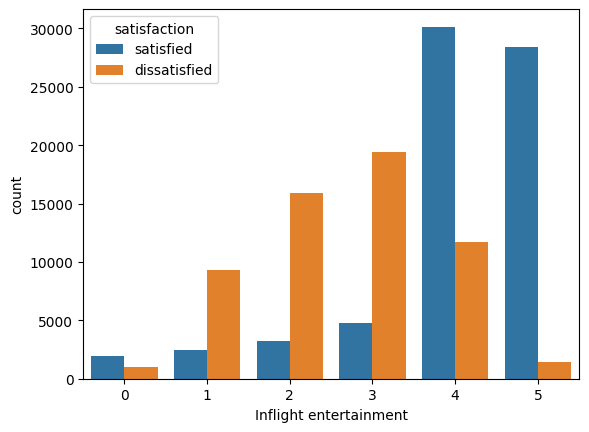

In [ ]:
sns.countplot(data=airline, x='Inflight entertainment', hue='satisfaction')

<Axes: xlabel='Online support', ylabel='count'>

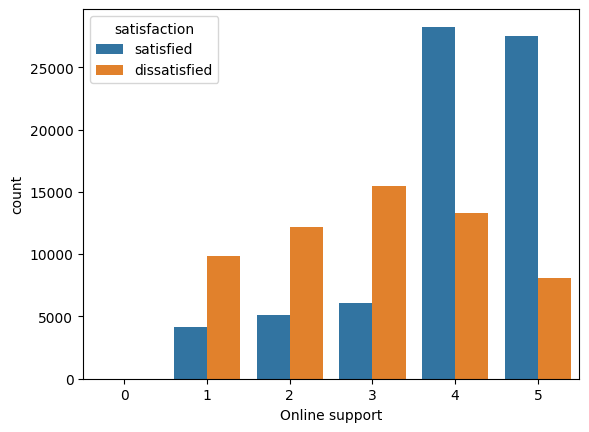

In [ ]:
sns.countplot(data=airline, x= 'Online support', hue='satisfaction')

<Axes: xlabel='Ease of Online booking', ylabel='count'>

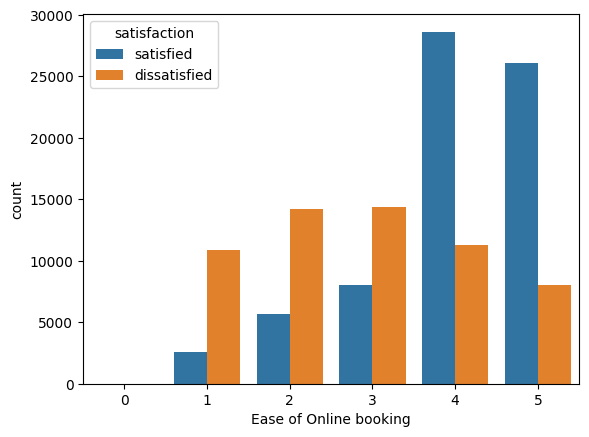

In [ ]:
sns.countplot(data=airline, x='Ease of Online booking', hue='satisfaction')

<Axes: xlabel='Leg room service', ylabel='count'>

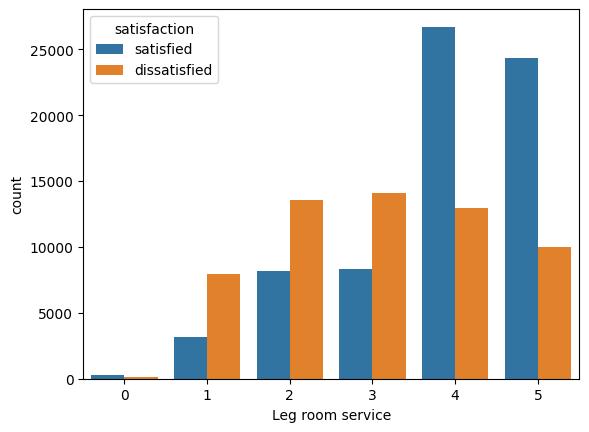

In [ ]:
sns.countplot(data=airline, x='Leg room service', hue='satisfaction')

<Axes: xlabel='Checkin service', ylabel='count'>

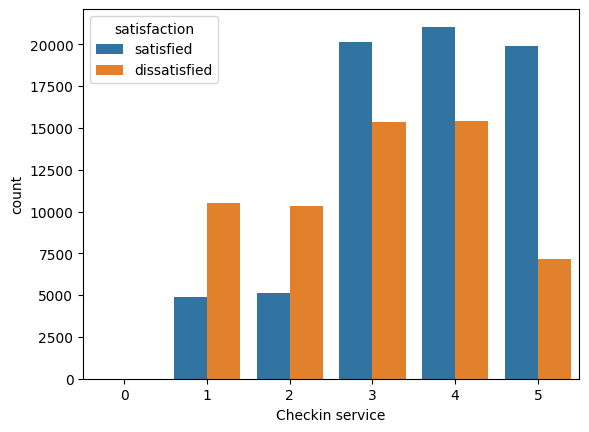

In [ ]:
sns.countplot(data=airline, x='Checkin service', hue='satisfaction')

<Axes: xlabel='Cleanliness', ylabel='count'>

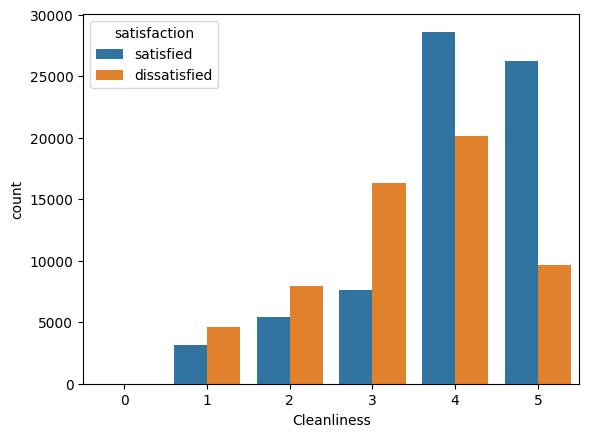

In [ ]:
sns.countplot(data=airline, x='Cleanliness', hue='satisfaction')

<Axes: xlabel='Seat comfort', ylabel='count'>

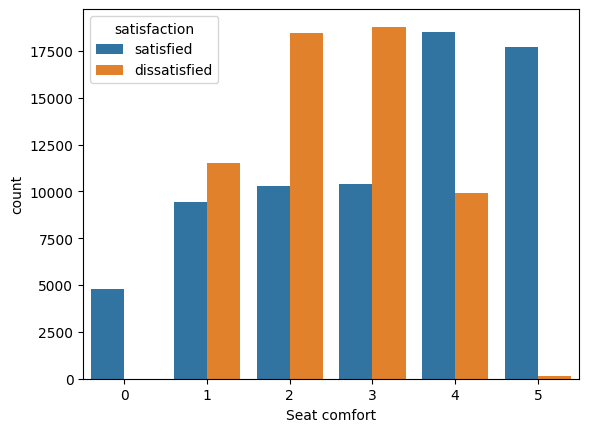

In [ ]:
sns.countplot(data=airline, x='Seat comfort', hue='satisfaction')

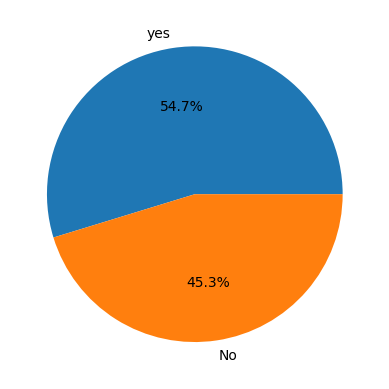

In [ ]:
plt.pie(airline['satisfaction'].value_counts(), autopct= '%1.1f%%', labels=['yes', 'No'])
plt.show()

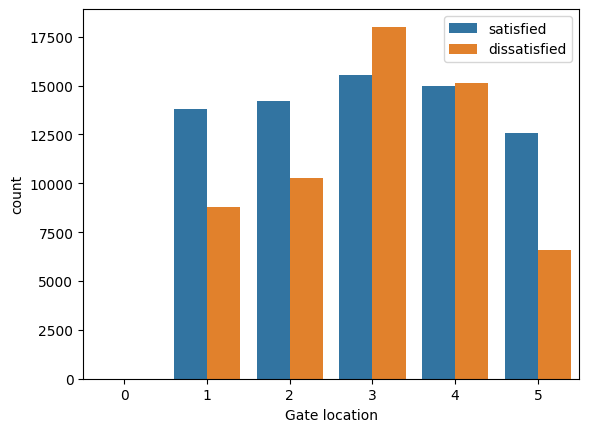

In [ ]:
sns.countplot(data=airline, x='Gate location', hue='satisfaction')
plt.legend(loc= 0)

<Axes: xlabel='Online boarding', ylabel='count'>

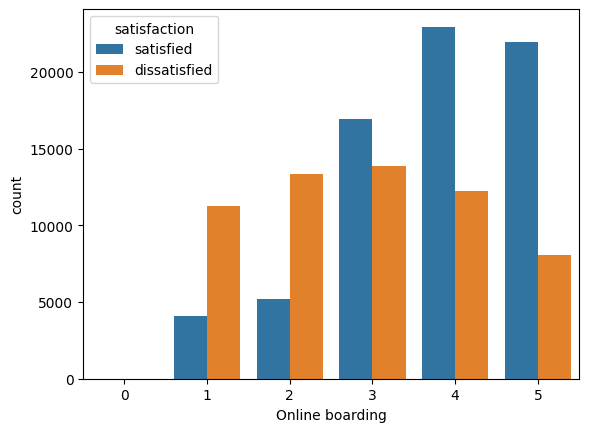

In [ ]:
sns.countplot(data=airline, x='Online boarding',hue='satisfaction')

<Axes: xlabel='Customer Type', ylabel='count'>

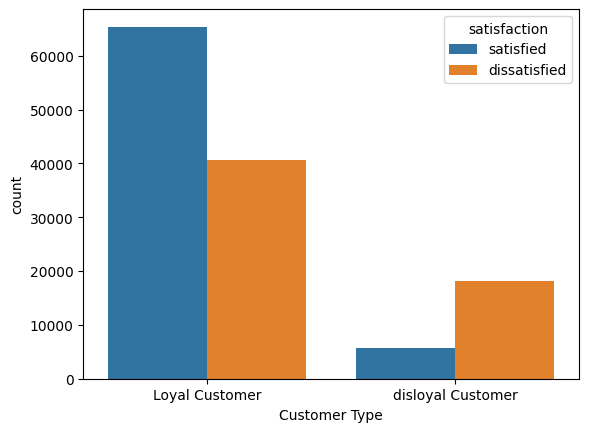

In [ ]:

sns.countplot(data=airline, x='Customer Type',hue='satisfaction')

<Axes: xlabel='Type of Travel', ylabel='count'>

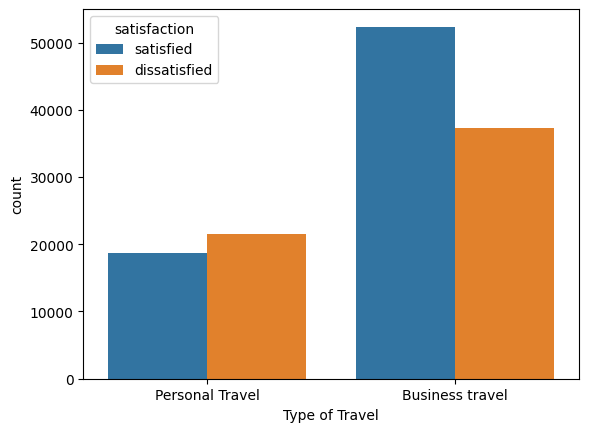

In [ ]:
sns.countplot(data=airline, x='Type of Travel',hue='satisfaction')

<Axes: xlabel='On-board service', ylabel='count'>

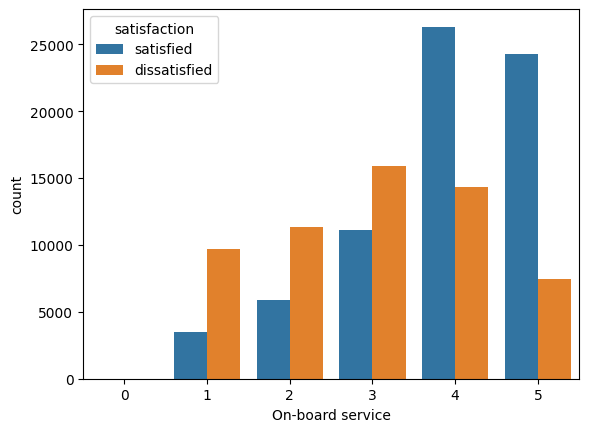

In [ ]:
sns.countplot(data=airline, x='On-board service',hue='satisfaction')

<Axes: xlabel='Baggage handling', ylabel='count'>

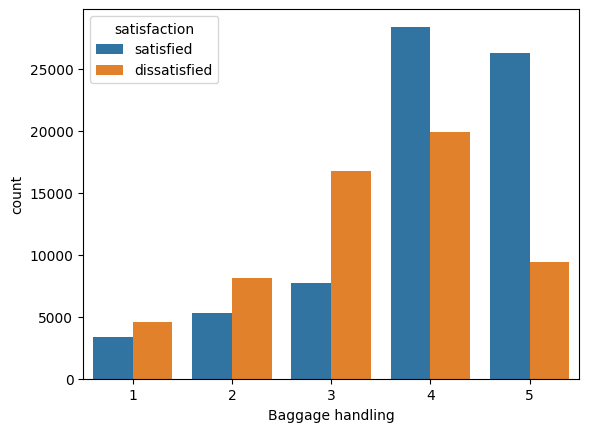

In [ ]:
sns.countplot(data=airline, x='Baggage handling',hue='satisfaction')

<Axes: xlabel='Flight Distance', ylabel='Density'>

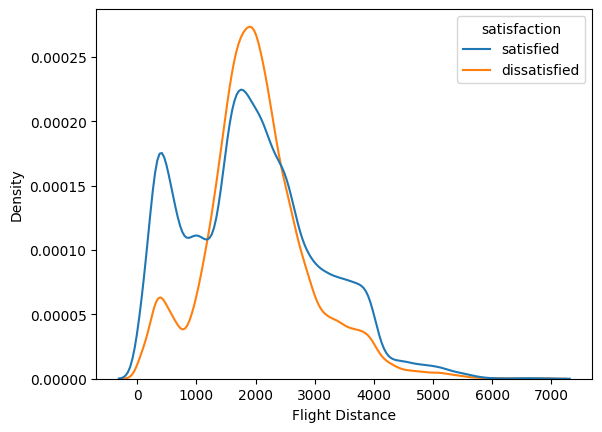

In [ ]:
sns.kdeplot(data=airline, x='Flight Distance',hue='satisfaction')

<Axes: xlabel='Flight Distance', ylabel='Departure Delay in Minutes'>

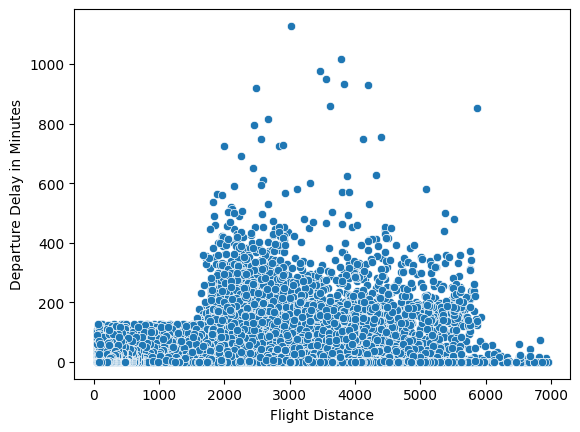

In [ ]:
sns.scatterplot(data=airline, x='Flight Distance', y='Departure Delay in Minutes')

Creating dummies for categorical data

In [ ]:
dummy= pd.get_dummies(airline[['Gender','Customer Type','Type of Travel','Class']],drop_first=True)
airline= pd.concat([airline,dummy],axis=1)

In [ ]:
airline= airline.drop(['Gender','Customer Type','Type of Travel','Class'], axis=1)
airline.head()

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,satisfied,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0,0,1,1,0
1,satisfied,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,1,0,1,0,0
2,satisfied,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0,0,1,1,0
3,satisfied,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0,0,1,1,0
4,satisfied,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0,0,1,1,0


## Converting Satisfaction cloumn data. Satisfied--> 1 Dissatisfied--> 0

In [ ]:
airline['satisfaction']= airline['satisfaction'].apply(lambda x:1 if x=='satisfied' else 0)

In [ ]:
airline['satisfaction'].value_counts()

1    71086
0    58792
Name: satisfaction, dtype: int64

#TrainTest Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= airline.drop('satisfaction',axis=1)
y= airline['satisfaction']

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=100)

**Feature Selection**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
numarical= ['Age', 'Flight Distance', 'Seat comfort','Departure/Arrival time convenient', 'Food and drink', 'Gate location','Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding','Departure Delay in Minutes',]

X_train[numarical]= scaler.fit_transform(X_train[numarical])


## **Satisfaction Rate**

In [ ]:
satisfaction_rate = sum(airline['satisfaction'])/len(airline['satisfaction'].index)*100
satisfaction_rate

54.73290318606693

Data has 54.7% satisfaction Rate

##Model Building

In [ ]:
import statsmodels.api as sm

In [ ]:
m1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                90914
Model:                            GLM   Df Residuals:                    90891
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35104.
Date:                Tue, 09 Jan 2024   Deviance:                       70208.
Time:                        05:19:58   Pearson chi2:                 1.15e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4540
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 1.7970      0.020     88.444      0.000       1.757       1.837
Age                                  -0.1113      0.010    -10.802      0.000      -0.131      -0.091
Flight Distance                      -0.1071      0.011    -10.157      0.000      -0.128      -0.086
Seat comfort                          0.3870      0.015     25.317      0.000       0.357       0.417
Departure/Arrival time convenient    -0.2853      0.012    -23.126      0.000      -0.309      -0.261
Food and drink                       -0.2991      0.016    -18.574      0.000      -0.331      -0.268
Gate location                         0.1417      0.012     11.889      0.000       0.118       0.165
Inflight wifi service                -0.0995      0.014     -7.117      0.000      -0.127      -0.072
Inflight entertainment                0.9225      0.013     69.063      0.000       0.896       0.949
Online support                        0.1225      0.014      8.701      0.000       0.095       0.150
Ease of Online booking                0.2963      0.018     16.348      0.000       0.261       0.332
On-board service                      0.3878      0.012     31.121      0.000       0.363       0.412
Leg room service                      0.2947      0.011     27.278      0.000       0.274       0.316
Baggage handling                      0.1248      0.013      9.724      0.000       0.100       0.150
Checkin service                       0.3709      0.010     35.574      0.000       0.350       0.391
Cleanliness                           0.0898      0.013      6.786      0.000       0.064       0.116
Online boarding                       0.2208      0.015     14.302      0.000       0.191       0.251
Departure Delay in Minutes           -0.1866      0.010    -18.735      0.000      -0.206      -0.167
Gender_Male                          -0.9562      0.020    -48.724      0.000      -0.995      -0.918
Customer Type_disloyal Customer      -1.9642      0.030    -65.917      0.000      -2.023      -1.906
Type of Travel_Personal Travel       -0.7666      0.028    -27.543      0.000      -0.821      -0.712
Class_Eco                            -0.7183      0.025    -28.446      0.000      -0.768      -0.669
Class_Eco Plus                       -0.7915      0.039    -20.438      0.000      -0.867      -0.716
=====================================================================================================
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
X_train.shape

(90914, 22)

##**RFE**

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', False, 11),
 ('Flight Distance', False, 12),
 ('Seat comfort', True, 1),
 ('Departure/Arrival time convenient', False, 4),
 ('Food and drink', False, 2),
 ('Gate location', False, 8),
 ('Inflight wifi service', False, 10),
 ('Inflight entertainment', True, 1),
 ('Online support', False, 9),
 ('Ease of Online booking', True, 1),
 ('On-board service', True, 1),
 ('Leg room service', False, 3),
 ('Baggage handling', False, 7),
 ('Checkin service', True, 1),
 ('Cleanliness', False, 13),
 ('Online boarding', False, 6),
 ('Departure Delay in Minutes', False, 5),
 ('Gender_Male', True, 1),
 ('Customer Type_disloyal Customer', True, 1),
 ('Type of Travel_Personal Travel', True, 1),
 ('Class_Eco', True, 1),
 ('Class_Eco Plus', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['Seat comfort', 'Inflight entertainment', 'Ease of Online booking',
       'On-board service', 'Checkin service', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['Age', 'Flight Distance', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Online support', 'Leg room service', 'Baggage handling', 'Cleanliness',
       'Online boarding', 'Departure Delay in Minutes'],
      dtype='object')

Model testing

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                90914
Model:                            GLM   Df Residuals:                    90903
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36708.
Date:                Tue, 09 Jan 2024   Deviance:                       73415.
Time:                        05:35:29   Pearson chi2:                 1.25e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4344
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               1.6978      0.019     88.822      0.000       1.660       1.735
Seat comfort                        0.1378      0.011     12.739      0.000       0.117       0.159
Inflight entertainment              0.9198      0.012     78.732      0.000       0.897       0.943
Ease of Online booking              0.6196      0.011     58.160      0.000       0.599       0.640
On-board service                    0.4771      0.011     44.900      0.000       0.456       0.498
Checkin service                     0.4155      0.010     42.213      0.000       0.396       0.435
Gender_Male                        -1.0019      0.019    -53.141      0.000      -1.039      -0.965
Customer Type_disloyal Customer    -1.7148      0.027    -63.056      0.000      -1.768      -1.662
Type of Travel_Personal Travel     -0.6941      0.026    -26.515      0.000      -0.745      -0.643
Class_Eco                          -0.7199      0.024    -29.702      0.000      -0.767      -0.672
Class_Eco Plus                     -0.7737      0.037    -20.694      0.000      -0.847      -0.700
===================================================================================================
"""

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Class_Eco,3.01
7,Type of Travel_Personal Travel,2.63
6,Customer Type_disloyal Customer,1.47
1,Inflight entertainment,1.44
5,Gender_Male,1.39
2,Ease of Online booking,1.35
3,On-board service,1.33
0,Seat comfort,1.26
9,Class_Eco Plus,1.22
4,Checkin service,1.14


## **Doing Prediction**

In [ ]:
y_train_pred = res.predict(X_train_sm)

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)

In [ ]:
y_train_pred_final = pd.DataFrame({'satisfy':y_train.values, 'satisfy_Prob':y_train_pred})
y_train_pred_final['PassengeID'] = y_train.index
y_train_pred_final.head()

,satisfy,satisfy_Prob,PassengeID
0,0,0.051198,44421
1,0,0.566833,25830
2,0,0.380510,35037
3,0,0.114441,68177
4,0,0.060169,55220


In [ ]:
#selecting random point for prediction
y_train_pred_final['predicted'] = y_train_pred_final.satisfy_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,satisfy,satisfy_Prob,PassengeID,predicted
0,0,0.051198,44421,0
1,0,0.566833,25830,1
2,0,0.380510,35037,0
3,0,0.114441,68177,0
4,0,0.060169,55220,0


## **Finding accuracy of the model**

In [ ]:
from sklearn import metrics

## Metrics

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.satisfy, y_train_pred_final.predicted )
print(confusion)

[[33634  7538]
 [ 7446 42296]]


In [ ]:
#the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.satisfy, y_train_pred_final.predicted))

0.8351849000153991


Overall accuracy is 83.5%

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8503075871496925

In [ ]:
# calculate specificity
TN / float(TN+FP)

0.8169144078499951

# **ROC Curve**

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.satisfy, y_train_pred_final.satisfy_Prob, drop_intermediate = False )

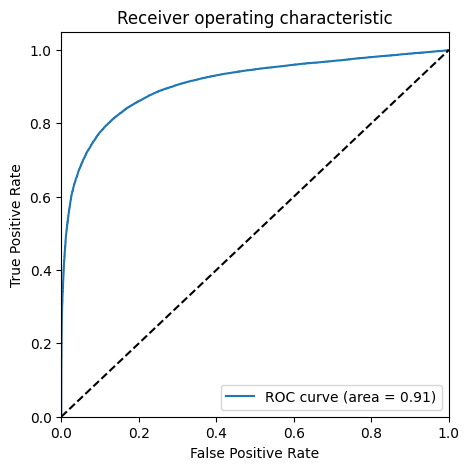

In [ ]:
draw_roc(y_train_pred_final.satisfy, y_train_pred_final.satisfy_Prob)

Area under ROC curve is 0.91

In [ ]:
# create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.satisfy_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,satisfy,satisfy_Prob,PassengeID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.051198,44421,0,1,0,0,0,0,0,0,0,0,0
1,0,0.566833,25830,1,1,1,1,1,1,1,0,0,0,0
2,0,0.380510,35037,0,1,1,1,1,0,0,0,0,0,0
3,0,0.114441,68177,0,1,1,0,0,0,0,0,0,0,0
4,0,0.060169,55220,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.satisfy, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.547132  1.000000  0.000000
0.1   0.1  0.676925  0.967532  0.325828
0.2   0.2  0.755043  0.943569  0.527276
0.3   0.3  0.798766  0.917937  0.654790
0.4   0.4  0.824680  0.887982  0.748203
0.5   0.5  0.835185  0.850308  0.816914
0.6   0.6  0.835933  0.804250  0.874211
0.7   0.7  0.824207  0.744522  0.920480
0.8   0.8  0.793376  0.655985  0.959366
0.9   0.9  0.711981  0.483012  0.988609


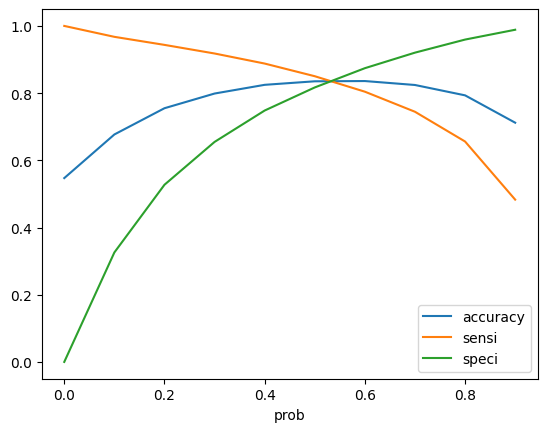

In [ ]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.55 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.satisfy_Prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head()

,satisfy,satisfy_Prob,PassengeID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.051198,44421,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.566833,25830,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.380510,35037,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.114441,68177,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.060169,55220,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# the overall accuracy.
metrics.accuracy_score(y_train_pred_final.satisfy, y_train_pred_final.final_predicted)

0.8367138174538575

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.satisfy, y_train_pred_final.final_predicted )
confusion2

array([[34836,  6336],
       [ 8509, 41233]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8289373165534156

In [ ]:
# calculate specificity
TN / float(TN+FP)

0.8461090061206645

Final Result

In [ ]:
satisfication_score= y_train_pred_final[['PassengeID',"satisfy_Prob",'final_predicted']]
satisfication_score.head()

,PassengeID,satisfy_Prob,final_predicted
0,44421,0.051198,0
1,25830,0.566833,1
2,35037,0.380510,0
3,68177,0.114441,0
4,55220,0.060169,0


In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                90914
Model:                            GLM   Df Residuals:                    90903
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36708.
Date:                Tue, 09 Jan 2024   Deviance:                       73415.
Time:                        05:44:43   Pearson chi2:                 1.25e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4344
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               1.6978      0.019     88.822      0.000       1.660       1.735
Seat comfort                        0.1378      0.011     12.739      0.000       0.117       0.159
Inflight entertainment              0.9198      0.012     78.732      0.000       0.897       0.943
Ease of Online booking              0.6196      0.011     58.160      0.000       0.599       0.640
On-board service                    0.4771      0.011     44.900      0.000       0.456       0.498
Checkin service                     0.4155      0.010     42.213      0.000       0.396       0.435
Gender_Male                        -1.0019      0.019    -53.141      0.000      -1.039      -0.965
Customer Type_disloyal Customer    -1.7148      0.027    -63.056      0.000      -1.768      -1.662
Type of Travel_Personal Travel     -0.6941      0.026    -26.515      0.000      -0.745      -0.643
Class_Eco                          -0.7199      0.024    -29.702      0.000      -0.767      -0.672
Class_Eco Plus                     -0.7737      0.037    -20.694      0.000      -0.847      -0.700
===================================================================================================
"""

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.satisfy, y_train_pred_final.final_predicted ))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82     41172
           1       0.87      0.83      0.85     49742

    accuracy                           0.84     90914
   macro avg       0.84      0.84      0.84     90914
weighted avg       0.84      0.84      0.84     90914



#**Conclusion:**
If airlines want passengers to be satisfied with their services, they must provide excellent service in the following areas:
- Seat comfort
- Inflight entertainment
- Ease of Online Booking
- On-board service
- Check-in service

Passengers who fly **Business class** or are **traveling for business**, especially **women**, tend to be more satisfied and likely to become **loyal customers**.